In [66]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

In [67]:
import numpy as np

In [68]:
from PIL import Image

In [69]:
image_dataset_test = tf.keras.utils.image_dataset_from_directory('C:/Datasets/Pneumonia(2)/chest_xray/test', batch_size=1000, image_size=(128, 128))

Found 624 files belonging to 2 classes.


In [70]:
for data_batch, labels in image_dataset_test:
    X_train_test = data_batch
    y_train_test = labels

In [71]:
X_train_test = np.sum(X_train_test / 3, axis=3, keepdims=True)    

In [72]:
X_train_test.shape

(624, 128, 128, 1)

In [73]:
image_dataset = tf.keras.utils.image_dataset_from_directory('C:/Datasets/Pneumonia(2)/chest_xray/train', batch_size=1000, image_size=(128, 128))

Found 5216 files belonging to 2 classes.


In [74]:
image_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [75]:
for data_batch, labels in image_dataset:
    X_train = data_batch
    y_train = labels

In [76]:
X_train

<tf.Tensor: shape=(216, 128, 128, 3), dtype=float32, numpy=
array([[[[ 38.       ,  38.       ,  38.       ],
         [ 51.59375  ,  51.59375  ,  51.59375  ],
         [ 59.96875  ,  59.96875  ,  59.96875  ],
         ...,
         [ 59.96875  ,  59.96875  ,  59.96875  ],
         [ 41.59375  ,  41.59375  ,  41.59375  ],
         [ 41.125    ,  41.125    ,  41.125    ]],

        [[ 43.0625   ,  43.0625   ,  43.0625   ],
         [ 54.40625  ,  54.40625  ,  54.40625  ],
         [ 62.65625  ,  62.65625  ,  62.65625  ],
         ...,
         [ 67.65625  ,  67.65625  ,  67.65625  ],
         [ 42.40625  ,  42.40625  ,  42.40625  ],
         [ 38.65625  ,  38.65625  ,  38.65625  ]],

        [[ 49.       ,  49.       ,  49.       ],
         [ 57.78125  ,  57.78125  ,  57.78125  ],
         [ 60.       ,  60.       ,  60.       ],
         ...,
         [ 77.96875  ,  77.96875  ,  77.96875  ],
         [ 65.9375   ,  65.9375   ,  65.9375   ],
         [ 46.       ,  46.       ,  46.    

In [77]:
X_train = np.sum(X_train / 3, axis=3, keepdims=True)    

In [78]:
y_train

<tf.Tensor: shape=(216,), dtype=int32, numpy=
array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])>

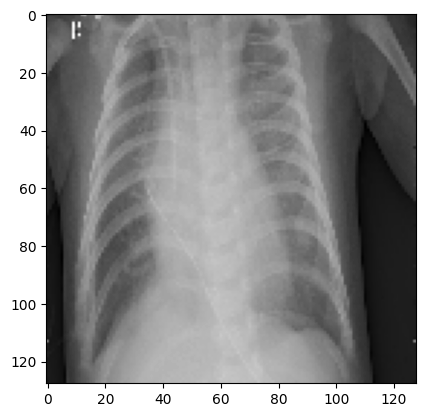

In [79]:
i = random.randint(0,20)
plt.imshow(X_train[i], cmap='gray')

In [80]:
lenet = tf.keras.models.Sequential()
lenet.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128,1)))
lenet.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))
lenet.add(tf.keras.layers.Conv2D(16, (5, 5), activation='relu'))
lenet.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2)))
lenet.add(tf.keras.layers.Flatten())
lenet.add(tf.keras.layers.Dense(128, activation='relu'))
lenet.add(tf.keras.layers.Dense(84, activation='relu'))
lenet.add(tf.keras.layers.Dense(2, activation='softmax'))


C:\Users\José Adauto\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [81]:
lenet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lenet.fit(X_train, y_train, batch_size=32, epochs=40)

Epoch 1/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.5836 - loss: 130.1246
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.7603 - loss: 1.3679
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.7805 - loss: 0.6735
Epoch 4/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.8498 - loss: 0.6356
Epoch 5/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.8602 - loss: 0.4498
Epoch 6/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.8357 - loss: 0.4117
Epoch 7/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9329 - loss: 0.2500
Epoch 8/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9300 - loss: 0.3055
Epoch 9/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.8976 - loss: 0.2404
Epoch 10/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.9528 - loss: 0.1587
Epoch 11/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9692 - loss: 0.0926
Epoch 12/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9809 - loss: 0.08

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


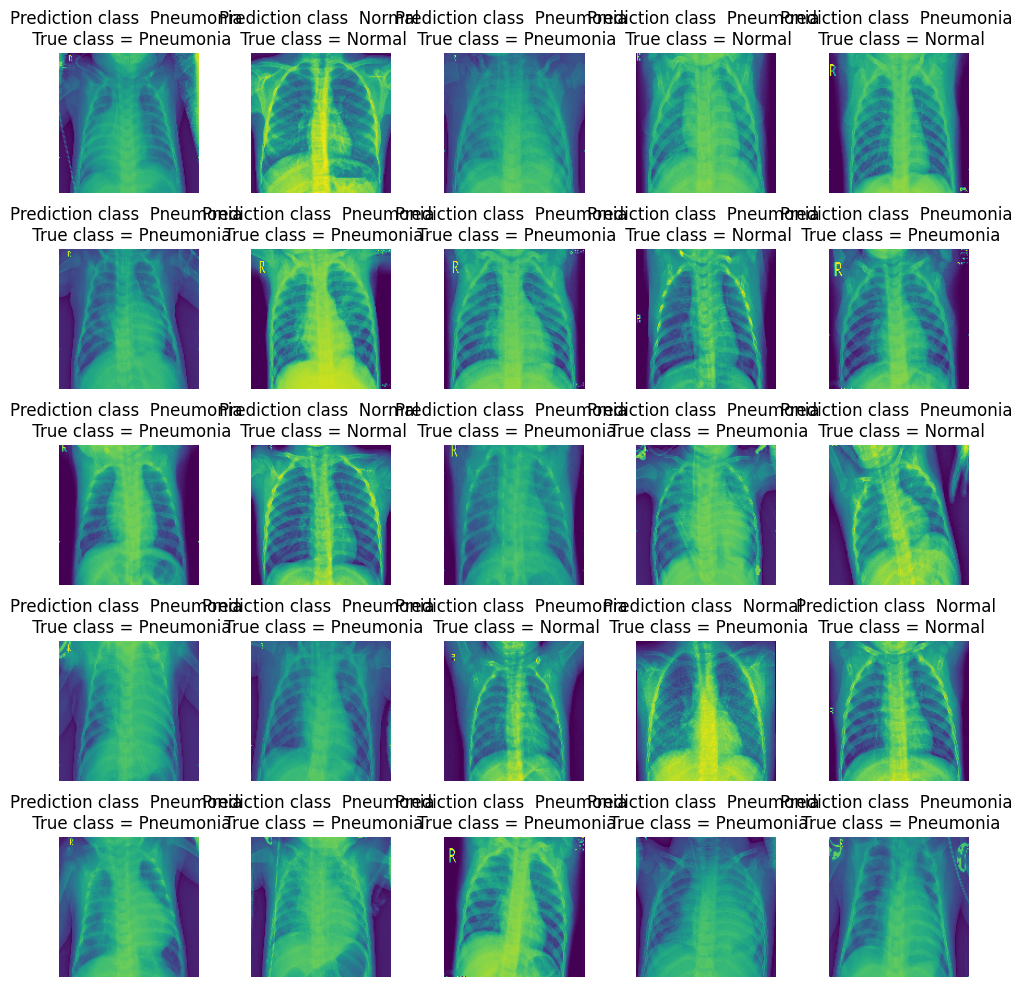

In [82]:
dictPneumonia = {
    0: "Normal",
    1: "Pneumonia"
}
predicted_classes = np.argmax(lenet.predict(X_train_test), axis=1)
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
    axes[i].imshow(X_train_test[i].reshape(128,128))
    pred_class_key = int(predicted_classes[i])  
    true_class_key = int(y_train_test[i])
    axes[i].set_title("Prediction class  {} \n True class = {}".format(dictPneumonia[pred_class_key],dictPneumonia[true_class_key]))
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [83]:
image = Image.open("C:/Datasets/Pneumonia(2)/teste.jpeg")
image = image.resize((128,128))

In [84]:
image_asarray = np.asarray(image)
image_asarray = np.expand_dims(image_asarray, axis=0)

In [85]:
image_asarray.shape

(1, 128, 128, 3)

In [86]:
image_asarray = np.sum(image_asarray / 3, axis=3, keepdims=True)

In [87]:
image_asarray.shape

(1, 128, 128, 1)

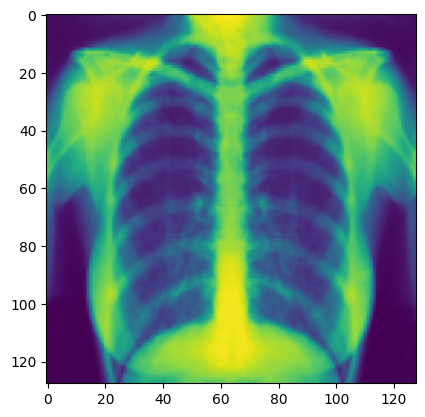

In [88]:
plt.imshow(image_asarray.reshape(128,128))

In [89]:
predict_xray = np.argmax(lenet.predict(image_asarray), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [90]:
predict_key = int(predict_xray[0])
dictPneumonia[predict_key]

'Normal'

In [91]:
lenet.save('models/Pneumonia.keras')